2023-07-22 17:48:51.802434: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2023-07-22 17:48:51.802457: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-07-22 17:48:51.802461: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-07-22 17:48:51.802492: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-22 17:48:51.802505: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                            

2023-07-22 17:48:53.146427: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 33s 19ms/step - loss: 1.4588 - accuracy: 0.4849
Epoch 2/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.0088 - accuracy: 0.6457
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8253 - accuracy: 0.7120
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7121 - accuracy: 0.7513
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.6277 - accuracy: 0.7802
Epoch 6/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.5460 - accuracy: 0.8092
Epoch 7/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.4771 - accuracy: 0.8321
Epoch 8/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.4208 - accuracy: 0.8515
Epoch 9/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.3773 - accuracy: 0.8665
Epoch 10/10
  6/313 [..............................] - ETA: 3s - loss: 0.71

2023-07-22 17:53:42.893160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 31/313 [=>............................] - ETA: 0s

2023-07-22 17:53:46.365918: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step


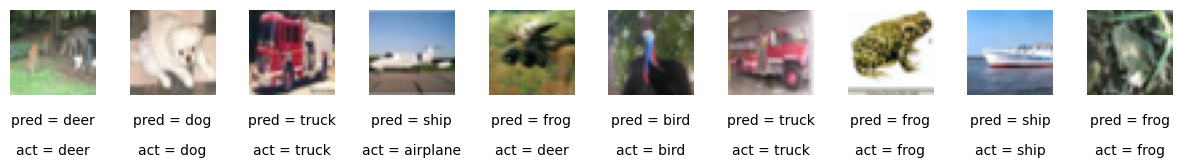

In [1]:
import numpy as np
from keras import datasets, utils, layers, models, optimizers
import tensorflow
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

NUM_CLASSES = 10

# tensorflow.config.set_visible_devices([], 'GPU')


x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

x_train[54, 12, 13, 1]

input_layer = layers.Input(shape=(32, 32, 3))

x = layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(input_layer)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=32, kernel_size=(3, 3), strides=2, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(filters=64, kernel_size=(3, 3), strides=2, padding='same', activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Flatten()(x)

x = layers.Dense(units=128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

x = layers.Dropout(rate=0.5)(x)

output_layer = layers.Dense(units=10, activation='softmax')(x)
model = models.Model(inputs=input_layer, outputs=output_layer)

model.summary()

print(x_train.shape)

print(y_train.shape)

opt = optimizers.legacy.Adam(learning_rate=0.0005)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

model.evaluate(x_test, y_test, batch_size=1000)

CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

n_to_show = 10
indicies = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indicies):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)